In [1]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16.0, 10.0)
# plt.rcParams['suptitle.fontsize'] = (18)
import os
from textwrap import wrap
os.chdir("/home/nitin/hopkins/neurodata/orange-panda/notes/bad_chan_detect")
from mat_py.helper import *
# Fix random seed
initseed = 123456789
np.random.seed(initseed)

In [2]:
os.chdir("/home/nitin/hopkins/neurodata/nicolas/numpy")
test = np.load("test.npz")
print test.keys()
# print test[0]

['test_arr1', 'test_arr2']


In [3]:
os.chdir("/home/nitin/hopkins/neurodata/nicolas/numpy")
patient_num = "gp_A00051826001"
patient_np = np.load(patient_num + "_jp.npz")
py_rej = patient_np['py_rej']
py_jp = patient_np['py_jp']
mat_rej = patient_np['mat_rej']
mat_jp = patient_np['mat_jp']
py_glob_rej = patient_np['py_glob_rej']
py_glob_jp = patient_np['py_glob_jp']
mat_glob_rej = patient_np['mat_glob_rej']
mat_glob_jp = patient_np['mat_glob_jp']

In [4]:
np.mean(mat_glob_jp)

-4.9695697292745099e-15

In [5]:
print py_rej.shape
print py_jp.shape
print mat_rej.shape
print mat_jp.shape

(1, 105, 4)
(105, 4)
(105, 4)
(105, 4)


In [6]:
print py_rej.any()
print mat_rej.any()

False
False


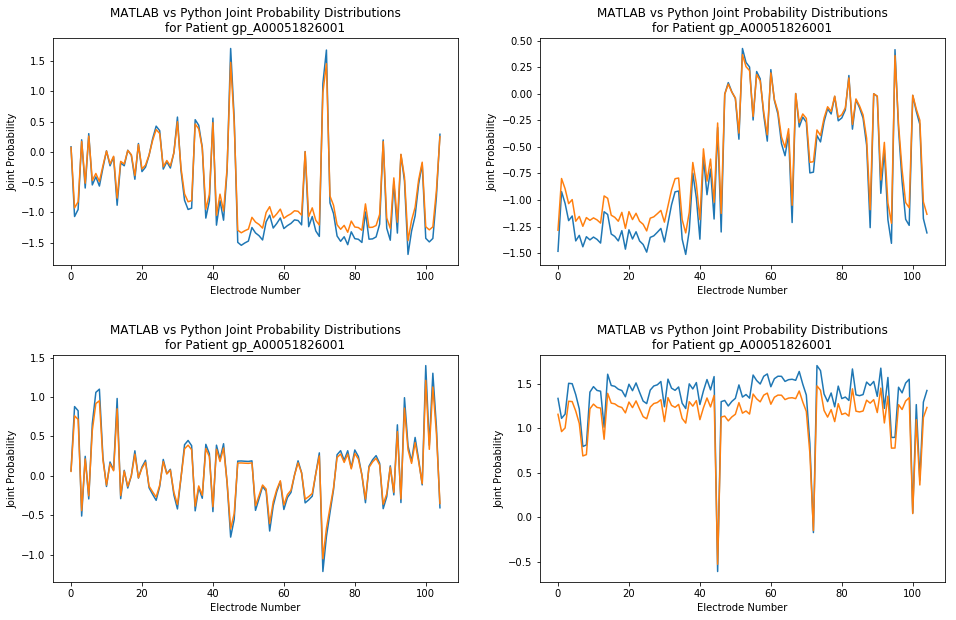

In [7]:
# plot the joint probs for different trials
fig = plt.figure()
for i in range(py_jp.shape[1]):
    ax = fig.add_subplot(2,2,i + 1)
    ax.plot(py_jp[:,i], label="Python")
    ax.plot(mat_jp[:,i], label="MATLAB")
    ax.set_title("\n".join(wrap("MATLAB vs Python Joint Probability Distributions for Patient " + patient_num, 50)))
    ax.set_xlabel('Electrode Number')
    ax.set_ylabel('Joint Probability')
#     ax.legend(loc='upper right')
fig.subplots_adjust(wspace=.2, hspace = .4)
plt.show()

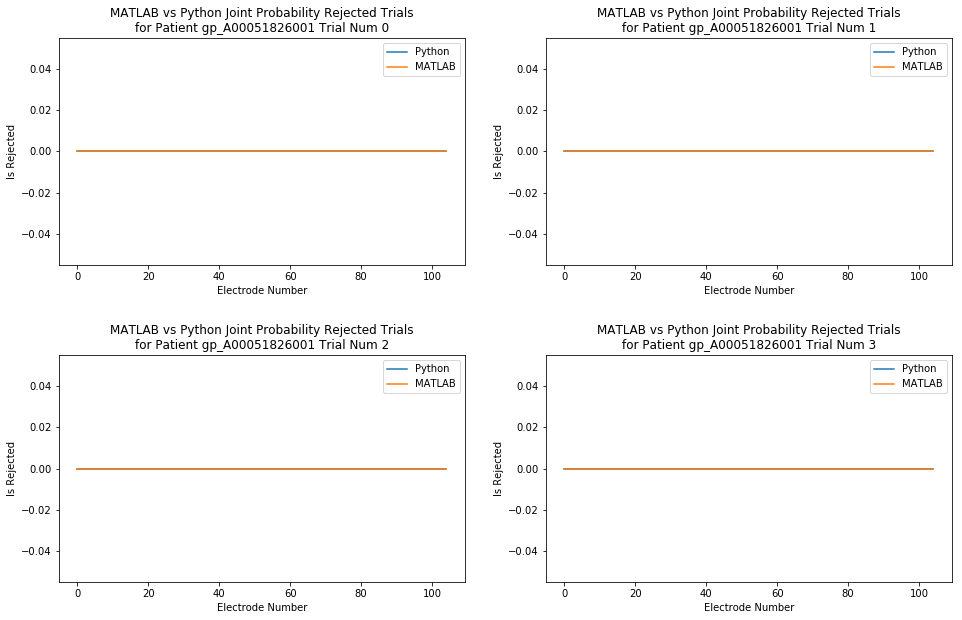

In [8]:
# plot the rejected electrodes for different trials
fig = plt.figure()
for i in range(py_rej.shape[2]):
    ax = fig.add_subplot(2,2,i + 1)
    ax.plot(py_rej[0,:,i], label="Python")
    ax.plot(mat_rej[:,i], label="MATLAB")
    ax.set_title("\n".join(wrap("MATLAB vs Python Joint Probability Rejected Trials for Patient " + patient_num + " Trial Num " + str(i), 50)))
    ax.set_xlabel('Electrode Number')
    ax.set_ylabel('Is Rejected')
    ax.legend(loc='upper right')
fig.subplots_adjust(wspace=.2, hspace = .4)
plt.show()

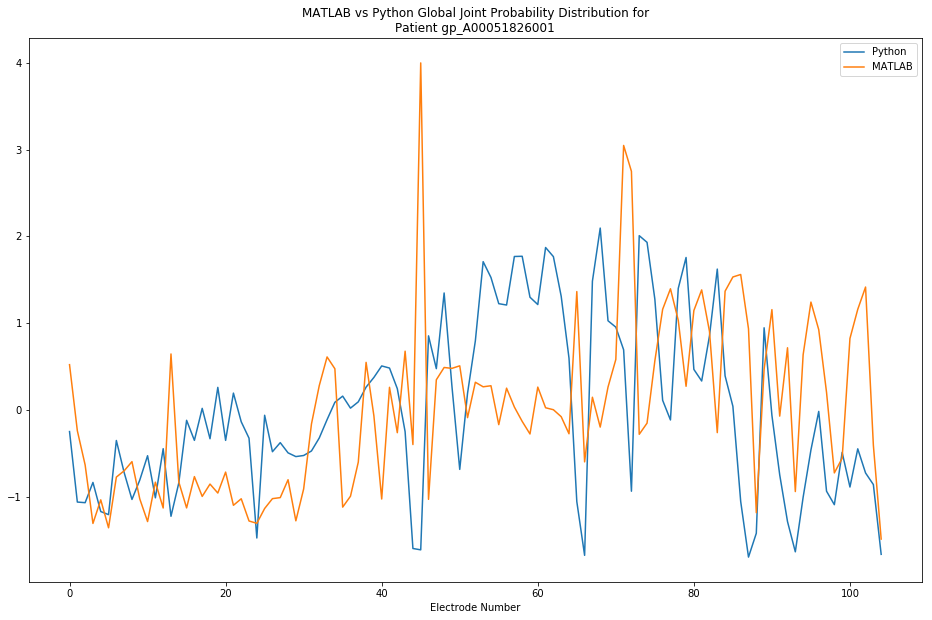

In [9]:
# plot the global joint prob
plt.plot(py_glob_jp, label="Python")
plt.plot(mat_glob_jp, label="MATLAB")
plt.title("\n".join(wrap("MATLAB vs Python Global Joint Probability Distribution for Patient " + patient_num, 60)), fontsize= 12)
plt.xlabel("Electrode Number")
plt.legend(loc='upper right')
# fig.subplots_adjust(wspace=.5)
plt.show()

In [10]:
check_change = np.load(patient_num + "tocheck_jp.npz")
py_new_glob_jp = check_change['py_glob_jp']

In [11]:
print np.mean(py_new_glob_jp)
print np.mean(py_glob_jp)
print mat_glob_jp[:10]
print -py_new_glob_jp[:10]

-1.76155386574e-15
-1.76155386574e-15
[[ 0.52298784]
 [-0.23777862]
 [-0.632683  ]
 [-1.30600554]
 [-1.03432698]
 [-1.35620385]
 [-0.77211817]
 [-0.69961753]
 [-0.5942794 ]
 [-1.02317751]]
[ 0.24776688  1.05967966  1.066939    0.83366647  1.16907837  1.2045024
  0.35051894  0.72044966  1.02967035  0.80653533]


In [12]:
# plot the global joint prob
plt.plot(reversed((-py_new_glob_jp).tolist()), label="New Python")
# plt.plot(-py_glob_jp, label="Old Python")
plt.plot(mat_glob_jp, label="MATLAB")
plt.title("\n".join(wrap("MATLAB vs Python Global Joint Probability Distribution for Patient " + patient_num, 60)), fontsize= 12)
plt.xlabel("Electrode Number")
plt.legend(loc='upper right')
# fig.subplots_adjust(wspace=.5)
plt.show()

TypeError: object of type 'listreverseiterator' has no len()

## Kurtosis Based Detection

In [10]:
os.chdir("/home/nitin/hopkins/neurodata/nicolas/numpy")
patient_num = "gp_A00054039001"
patient_kurt_np = np.load("gp_A00054039001_kurt.npz")
py_rej = patient_kurt_np['py_rej']
py_kurt = patient_kurt_np['py_kurt']
mat_rej = patient_kurt_np['mat_rej']
mat_kurt = patient_kurt_np['mat_kurt']

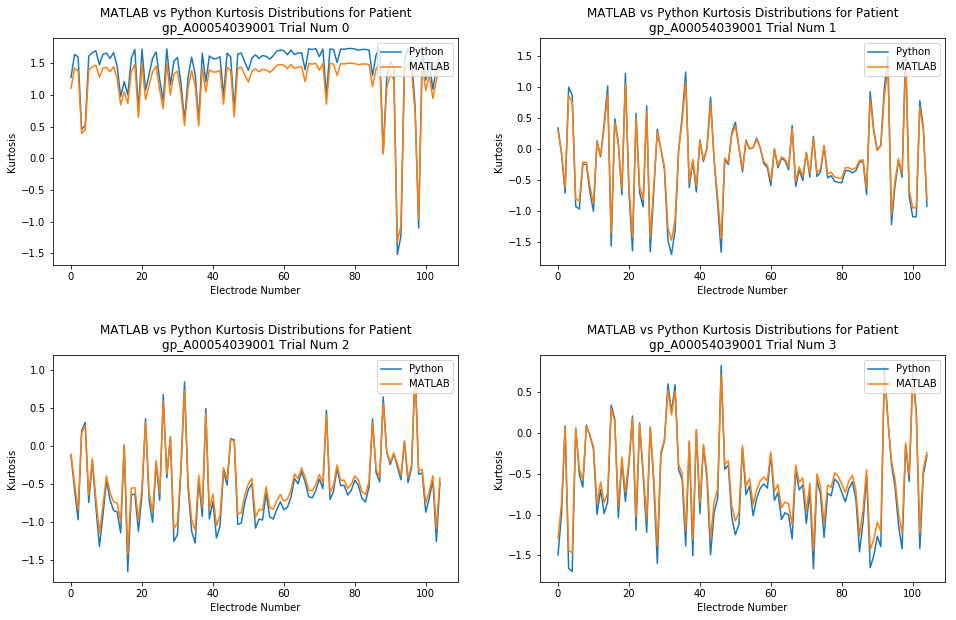

In [11]:
# plot the Kurtosis for different trials
fig = plt.figure(figsize=(16,10))
for i in range(py_kurt.shape[1]):
    ax = fig.add_subplot(2,2,i + 1)
    ax.plot(py_kurt[:,i], label="Python")
    ax.plot(mat_kurt[:,i], label="MATLAB")
    ax.set_title("\n".join(wrap("MATLAB vs Python Kurtosis Distributions for Patient " + patient_num + " Trial Num " + str(i), 60)))
    ax.set_xlabel('Electrode Number')
    ax.set_ylabel('Kurtosis')
    ax.legend(loc='upper right')
fig.subplots_adjust(wspace=.2, hspace = .4)
plt.show()

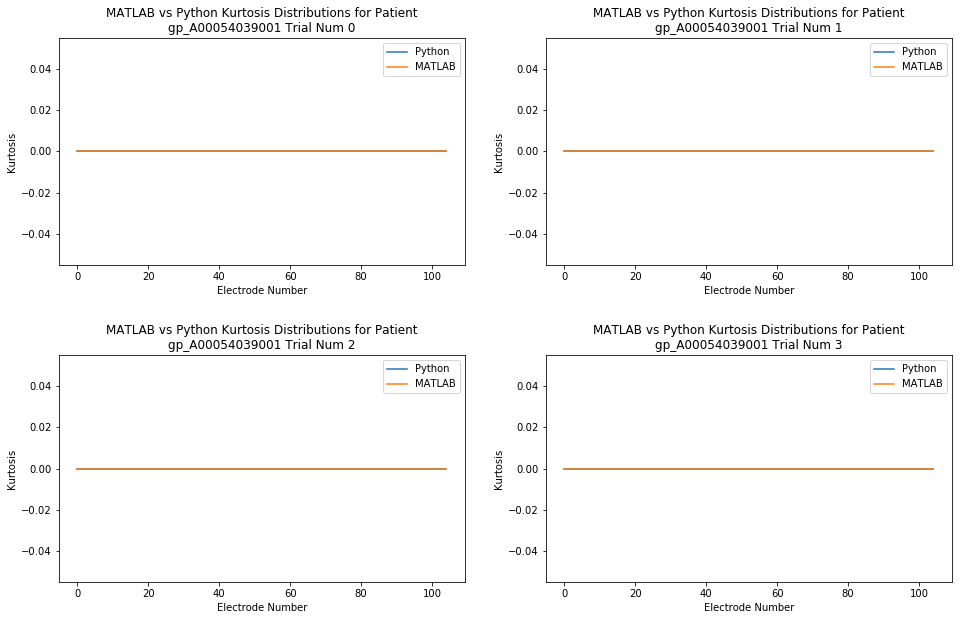

In [12]:
# we want to compare the different bad elecs. First let's show the bad elecs

# plot the rejected electrodes for different trials
fig = plt.figure(figsize=(16,10))
for i in range(py_rej.shape[2]):
    ax = fig.add_subplot(2,2,i + 1)
    ax.plot(py_rej[0,:,i], label="Python")
    ax.plot(mat_rej[:,i], label="MATLAB")
    ax.set_title("\n".join(wrap("MATLAB vs Python Kurtosis Distributions for Patient " + patient_num + " Trial Num " + str(i), 60)))
    ax.set_xlabel('Electrode Number')
    ax.set_ylabel('Kurtosis')
    ax.legend(loc='upper right')
fig.subplots_adjust(wspace=.2, hspace = .4)
plt.show()

In [13]:
py_glob_rej = patient_kurt_np['py_glob_rej']
py_glob_kurt = patient_kurt_np['py_glob_kurt']
mat_glob_rej = patient_kurt_np['mat_glob_rej']
mat_glob_kurt = patient_kurt_np['mat_glob_kurt']

In [14]:
print py_glob_rej.shape
print mat_glob_rej.shape
print py_glob_kurt.shape
print mat_glob_kurt.shape

(1, 105, 1)
(105, 1)
(105, 1)
(105, 1)


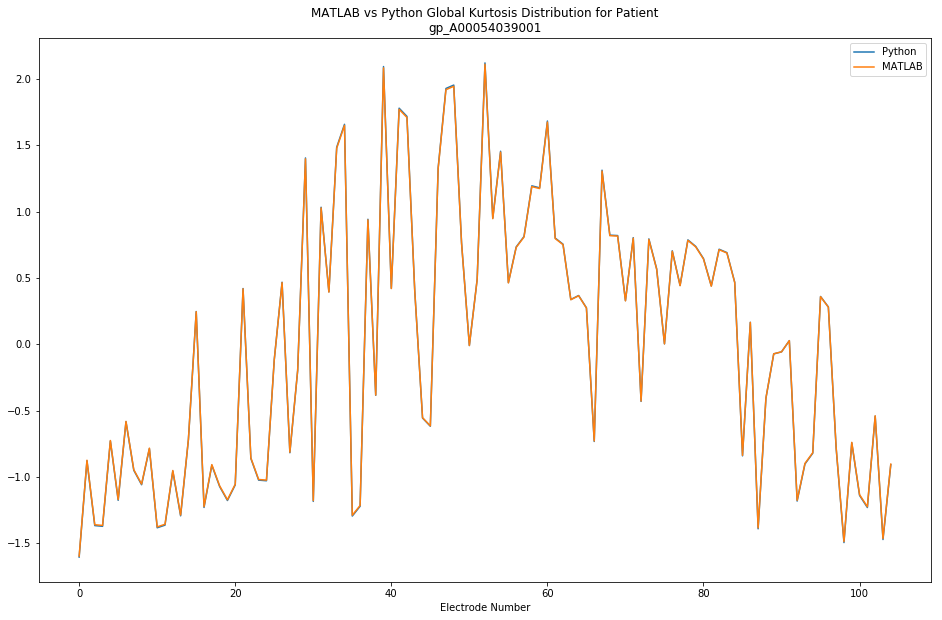

In [15]:
# plot the joint probs for different trials
plt.plot(py_glob_kurt, label="Python")
plt.plot(mat_glob_kurt, label="MATLAB")
plt.title("\n".join(wrap("MATLAB vs Python Global Kurtosis Distribution for Patient " + patient_num, 60)))
plt.xlabel("Electrode Number")
plt.legend(loc='upper right')
# fig.subplots_adjust(wspace=.5)
plt.show()

In [16]:
patient, time, auto_bad, man_bad, zero = list(get_patient(patient_num + ".mat")[i] for i in range(5))

In [17]:
nic_rej = np.zeros(111)
nic_rej[auto_bad] = 1
nic_rej = np.delete(nic_rej, zero, 0)
nic_man_rej = np.zeros(111)
nic_man_rej[man_bad] = 1
nic_man_rej = np.delete(nic_man_rej, zero, 0)

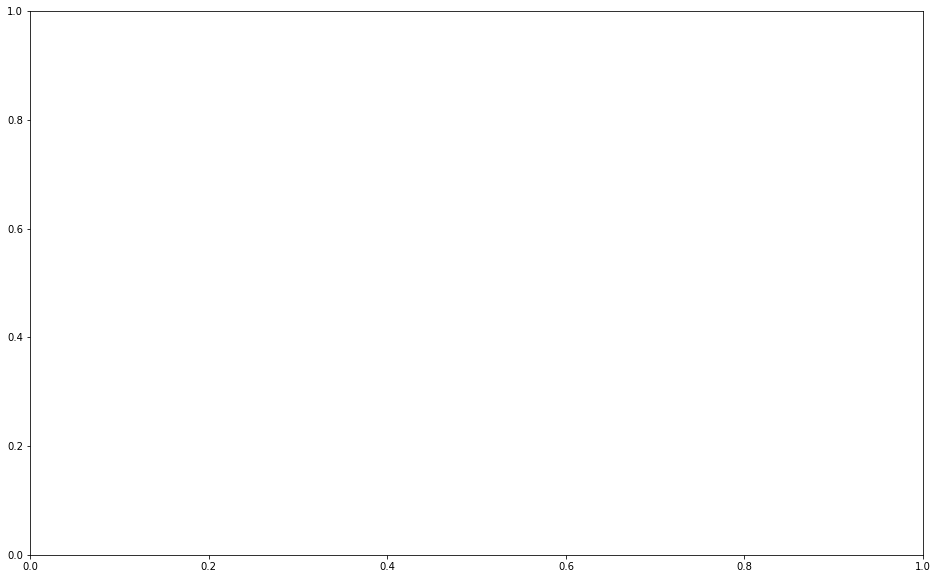

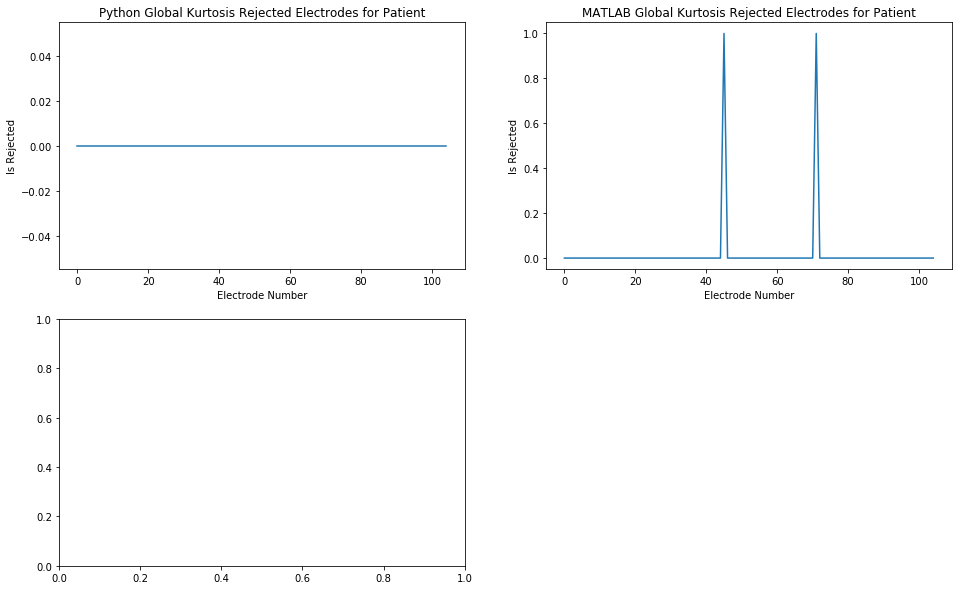

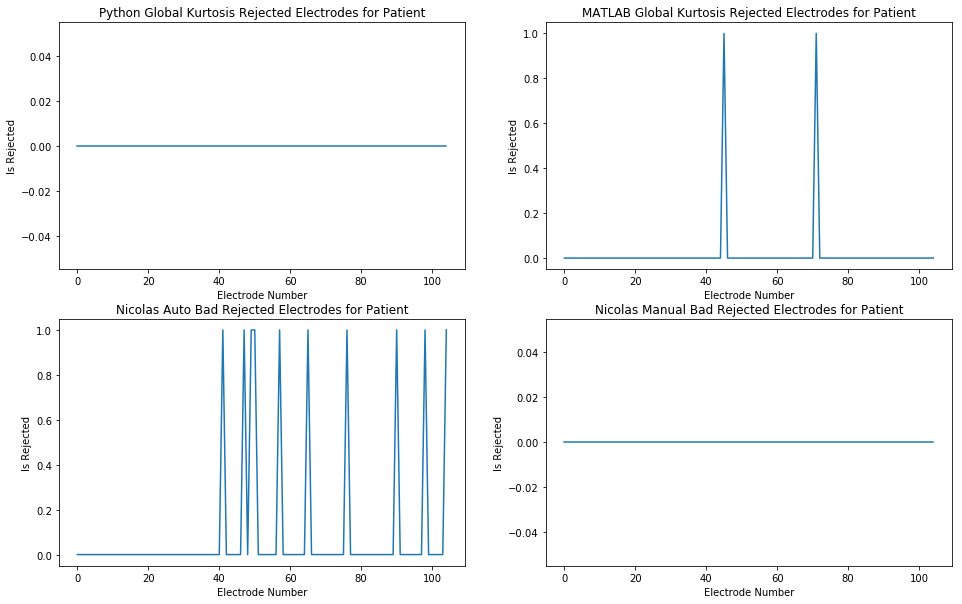

In [18]:
# we want to compare the different bad elecs. First let's show the bad elecs
# for i in range(py_jp.shape[1]):

fig = plt.figure(figsize=(16,10))
# First Python Rej
ax = fig.add_subplot(2,2,1)
ax.plot(py_glob_rej[0,:], label="Python")
ax.set_title("\n".join(wrap("Python Global Kurtosis Rejected Electrodes for Patient", 60)))
ax.set_xlabel('Electrode Number')
ax.set_ylabel('Is Rejected')
# First MATLAB Rej
ax = fig.add_subplot(2,2,2)
ax.plot(mat_glob_rej, label="Python")
ax.set_title("\n".join(wrap("MATLAB Global Kurtosis Rejected Electrodes for Patient", 60)))
ax.set_xlabel('Electrode Number')
ax.set_ylabel('Is Rejected')
# Nicolas Auto Rej
ax = fig.add_subplot(2,2,3)
ax.plot(nic_rej, label="Nicolas Auto Bad")
ax.set_title("\n".join(wrap("Nicolas Auto Bad Rejected Electrodes for Patient", 60)))
ax.set_xlabel('Electrode Number')
ax.set_ylabel('Is Rejected')
# Nicolas Manual Rej
ax = fig.add_subplot(2,2,4)
ax.plot(nic_man_rej, label="Nicolas Manual Bad")
ax.set_title("\n".join(wrap("Nicolas Manual Bad Rejected Electrodes for Patient", 60)))
ax.set_xlabel('Electrode Number')
ax.set_ylabel('Is Rejected')

plt.show()

In [19]:
print py_glob_rej[0,:].shape
print mat_glob_rej.shape
print nic_rej.shape
print nic_man_rej.shape
final_dat = np.column_stack((py_glob_rej[0,:], mat_glob_rej, nic_rej, nic_man_rej))
fig = plt.pcolor(final_dat.T, cmap='hot', interpolation='nearest', aspect='auto')
# fig.set_yticklabels(column_labels, minor=False)
plt.show()

(105,)
(105, 1)
(105,)
(105,)


AttributeError: Unknown property aspect

In [ ]:
print np.where(py_glob_rej[0,:,:])[0]
print np.where(mat_glob_rej[:,:])[0]

In [ ]:
patient, time, auto_bad, man_bad, zero = list(get_patient(patient_num + ".mat")[i] for i in range(5))

In [ ]:
print zero

In [ ]:
print auto_bad
print man_bad

In [ ]:
# Need a function to eliminate the zero electrodes the same 

## Put the 2 Together

In [ ]:
os.chdir("/home/nitin/hopkins/neurodata/nicolas/numpy")
patient_jp_np = np.load(patient_names[0] + "_jp.npz")
py_rej = patient_jp_np['py_rej']
py_jp = patient_jp_np['py_jp']
mat_rej = patient_jp_np['mat_rej']
mat_jp = patient_jp_np['mat_jp']
py_glob_rej = patient_jp_np['py_glob_rej']
py_glob_jp = patient_jp_np['py_glob_jp']
mat_glob_rej = patient_jp_np['mat_glob_rej']
mat_glob_jp = patient_jp_np['mat_glob_jp']

In [20]:
print py_glob_rej.shape

(1, 105)


In [21]:
def plot_data(patient_num):
    
    ########## Get Original Patient Data
    
    patient, time, auto_bad, man_bad, zero = list(get_patient(patient_num + ".mat")[i] for i in range(5))
    nic_rej = np.zeros(111)
    nic_rej[auto_bad] = 1
    nic_rej = np.delete(nic_rej, zero, 0)
    nic_man_rej = np.zeros(111)
    nic_man_rej[man_bad] = 1
    nic_man_rej = np.delete(nic_man_rej, zero, 0)
    
    sup_size = 18
    
    ########## Joint Prob
    
    # grab the data
    os.chdir("/home/nitin/hopkins/neurodata/nicolas/numpy")
    patient_jp_np = np.load(patient_num + "_jp.npz")
    py_rej = patient_jp_np['py_rej']
    py_jp = patient_jp_np['py_jp']
    mat_rej = patient_jp_np['mat_rej']
    mat_jp = patient_jp_np['mat_jp']
    py_glob_rej = patient_jp_np['py_glob_rej']
    py_glob_jp = patient_jp_np['py_glob_jp']
    mat_glob_rej = patient_jp_np['mat_glob_rej']
    mat_glob_jp = patient_jp_np['mat_glob_jp']
    
    # plot the joint probs for different trials
    fig = plt.figure()
    for i in range(py_jp.shape[1]):
        ax = fig.add_subplot(2,2,i + 1)
        ax.plot(py_jp[:,i], label="Python")
        ax.plot(mat_jp[:,i], label="MATLAB")
        ax.set_title("\n".join(wrap("MATLAB vs Python Joint Probability Distributions for Patient " + patient_num, 50)))
        ax.set_xlabel('Electrode Number')
        ax.set_ylabel('Joint Probability')
    #     ax.legend(loc='upper right')
    fig.subplots_adjust(wspace=.2, hspace = .4)
    fig.suptitle('Joint Probability Distributions', fontsize = sup_size)
    plt.show()
    
    # plot the rejected electrodes for different trials
    fig = plt.figure()
    for i in range(py_rej.shape[2]):
        ax = fig.add_subplot(2,2,i + 1)
        ax.plot(py_rej[0,:,i], label="Python")
        ax.plot(mat_rej[:,i], label="MATLAB")
        ax.set_title("\n".join(wrap("MATLAB vs Python Joint Probability Rejected Trials for Patient " + patient_num + " Trial Num " + str(i), 50)))
        ax.set_xlabel('Electrode Number')
        ax.set_ylabel('Is Rejected')
        ax.legend(loc='upper right')
    fig.subplots_adjust(wspace=.2, hspace = .4)
    fig.suptitle('Joint Probability Rejected Electrodes', fontsize = sup_size)
    plt.show()
    
    # plot the global joint prob
    plt.plot(py_glob_jp, label="Python")
    plt.plot(mat_glob_jp, label="MATLAB")
    plt.title("\n".join(wrap("MATLAB vs Python Global Joint Probability Distribution for Patient " + patient_num, 60)), fontsize= sup_size)
    plt.xlabel("Electrode Number")
    plt.legend(loc='upper right')
    # fig.subplots_adjust(wspace=.5)
    plt.show()
    
    # we want to compare the global bad elecs
    fig = plt.figure(figsize=(16,10))
    # First Python Rej
    ax = fig.add_subplot(2,2,1)
    ax.plot(py_glob_rej[0,:], label="Python")
    ax.set_title("\n".join(wrap("Python Global Joint Probability Rejected Electrodes for Patient", 60)))
    ax.set_xlabel('Electrode Number')
    ax.set_ylabel('Is Rejected')
    # First MATLAB Rej
    ax = fig.add_subplot(2,2,2)
    ax.plot(mat_glob_rej, label="Python")
    ax.set_title("\n".join(wrap("MATLAB Global Joint Probability Rejected Electrodes for Patient", 60)))
    ax.set_xlabel('Electrode Number')
    ax.set_ylabel('Is Rejected')
    # Nicolas Auto Rej
    ax = fig.add_subplot(2,2,3)
    ax.plot(nic_rej, label="Nicolas Auto Bad")
    ax.set_title("\n".join(wrap("Nicolas Auto Bad Rejected Electrodes for Patient", 60)))
    ax.set_xlabel('Electrode Number')
    ax.set_ylabel('Is Rejected')
    # Nicolas Manual Rej
    ax = fig.add_subplot(2,2,4)
    ax.plot(nic_man_rej, label="Nicolas Manual Bad")
    ax.set_title("\n".join(wrap("Nicolas Manual Bad Rejected Electrodes for Patient", 60)))
    ax.set_xlabel('Electrode Number')
    ax.set_ylabel('Is Rejected')

    fig.suptitle('Global Kurtosis Joint Probability Electrodes', fontsize = sup_size)
    plt.show()
    
    ########## Kurtosis
    
    patient_kurt_np = np.load(patient_num + "_kurt.npz")
    py_rej = patient_kurt_np['py_rej']
    py_kurt = patient_kurt_np['py_kurt']
    mat_rej = patient_kurt_np['mat_rej']
    mat_kurt = patient_kurt_np['mat_kurt']
    py_glob_rej = patient_kurt_np['py_glob_rej']
    py_glob_kurt = patient_kurt_np['py_glob_kurt']
    mat_glob_rej = patient_kurt_np['mat_glob_rej']
    mat_glob_kurt = patient_kurt_np['mat_glob_kurt']
    
    # plot the Kurtosis for different trials
    fig = plt.figure(figsize=(16,10))
    for i in range(py_kurt.shape[1]):
        ax = fig.add_subplot(2,2,i + 1)
        ax.plot(py_kurt[:,i], label="Python")
        ax.plot(mat_kurt[:,i], label="MATLAB")
        ax.set_title("\n".join(wrap("MATLAB vs Python Kurtosis Distributions for Patient " + patient_num + " Trial Num " + str(i), 60)))
        ax.set_xlabel('Electrode Number')
        ax.set_ylabel('Kurtosis')
        ax.legend(loc='upper right')
    fig.subplots_adjust(wspace=.2, hspace = .4)
    fig.suptitle('Kurtosis Distributions', fontsize = sup_size)
    plt.show()
    
    # we want to compare the different bad elecs. First let's show the bad elecs

    # plot the rejected electrodes for different trials
    fig = plt.figure(figsize=(16,10))
    for i in range(py_rej.shape[2]):
        ax = fig.add_subplot(2,2,i + 1)
        ax.plot(py_rej[0,:,i], label="Python")
        ax.plot(mat_rej[:,i], label="MATLAB")
        ax.set_title("\n".join(wrap("MATLAB vs Python Kurtosis Distributions for Patient " + patient_num + " Trial Num " + str(i), 60)))
        ax.set_xlabel('Electrode Number')
        ax.set_ylabel('Kurtosis')
        ax.legend(loc='upper right')
    fig.subplots_adjust(wspace=.2, hspace = .4)
    fig.suptitle('Kurtosis Rejected Electrodes', fontsize = sup_size)
    plt.show()
    
    # plot the global kurtosis
    plt.plot(py_glob_kurt, label="Python")
    plt.plot(mat_glob_kurt, label="MATLAB")
    plt.title("\n".join(wrap("MATLAB vs Python Global Kurtosis Distribution for Patient " + patient_num, 60)), fontsize= sup_size)
    plt.xlabel("Electrode Number")
    plt.legend(loc='upper right')
    # fig.subplots_adjust(wspace=.5)
    plt.show()
    
    # we want to compare the global bad elecs
    fig = plt.figure(figsize=(16,10))
    # First Python Rej
    ax = fig.add_subplot(2,2,1)
    ax.plot(py_glob_rej[0,:,:], label="Python")
    ax.set_title("\n".join(wrap("Python Global Kurtosis Rejected Electrodes for Patient", 60)))
    ax.set_xlabel('Electrode Number')
    ax.set_ylabel('Is Rejected')
    # First MATLAB Rej
    ax = fig.add_subplot(2,2,2)
    ax.plot(mat_glob_rej, label="Python")
    ax.set_title("\n".join(wrap("MATLAB Global Kurtosis Rejected Electrodes for Patient", 60)))
    ax.set_xlabel('Electrode Number')
    ax.set_ylabel('Is Rejected')
    # Nicolas Auto Rej
    ax = fig.add_subplot(2,2,3)
    ax.plot(nic_rej, label="Nicolas Auto Bad")
    ax.set_title("\n".join(wrap("Nicolas Auto Bad Rejected Electrodes for Patient", 60)))
    ax.set_xlabel('Electrode Number')
    ax.set_ylabel('Is Rejected')
    # Nicolas Manual Rej
    ax = fig.add_subplot(2,2,4)
    ax.plot(nic_man_rej, label="Nicolas Manual Bad")
    ax.set_title("\n".join(wrap("Nicolas Manual Bad Rejected Electrodes for Patient", 60)))
    ax.set_xlabel('Electrode Number')
    ax.set_ylabel('Is Rejected')

    fig.suptitle('Global Kurtosis Rejected Electrodes', fontsize = sup_size)
    plt.show()

In [22]:
# List all patient names
patient_names = [
    "gp_A00051826001"
#     "bip_A00053375001",
#     "gip_A00051955001",
#     "gip_A00053440001",
#     "gip_A00054417001",
#     "bip_A00054215001",
#     "gip_A00054207001",
#     "gp_A00054039001"
]

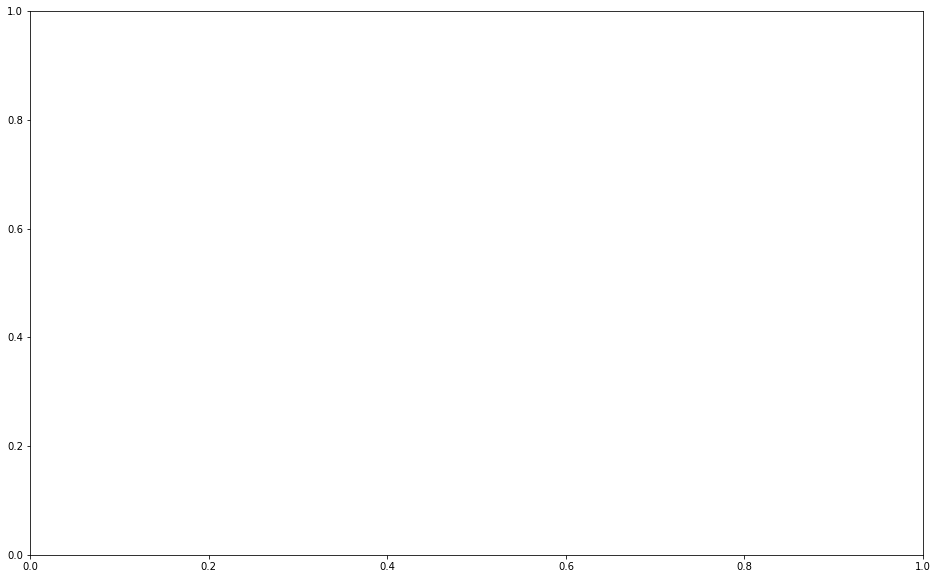

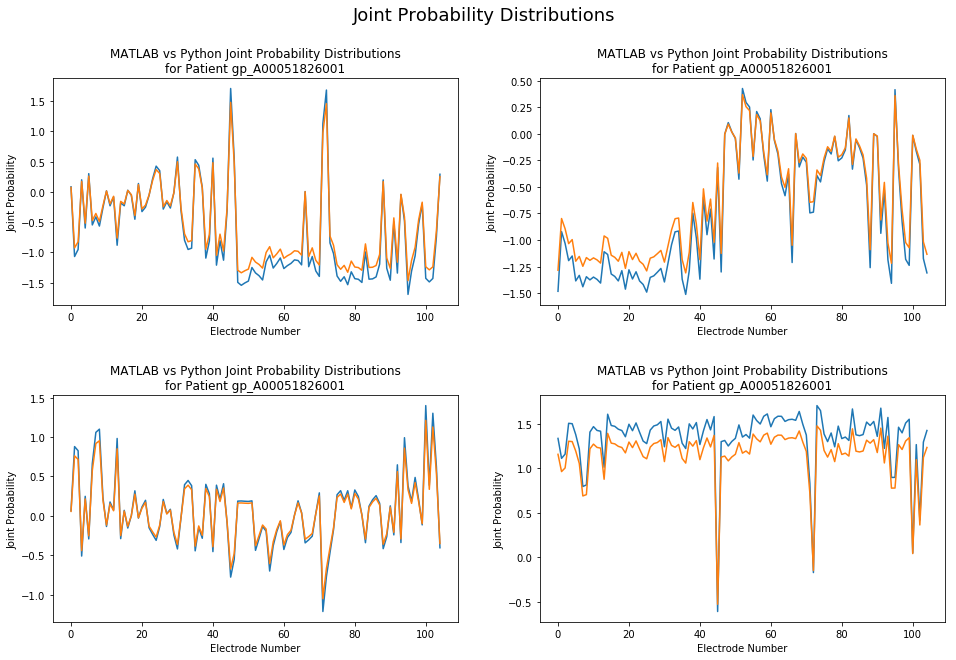

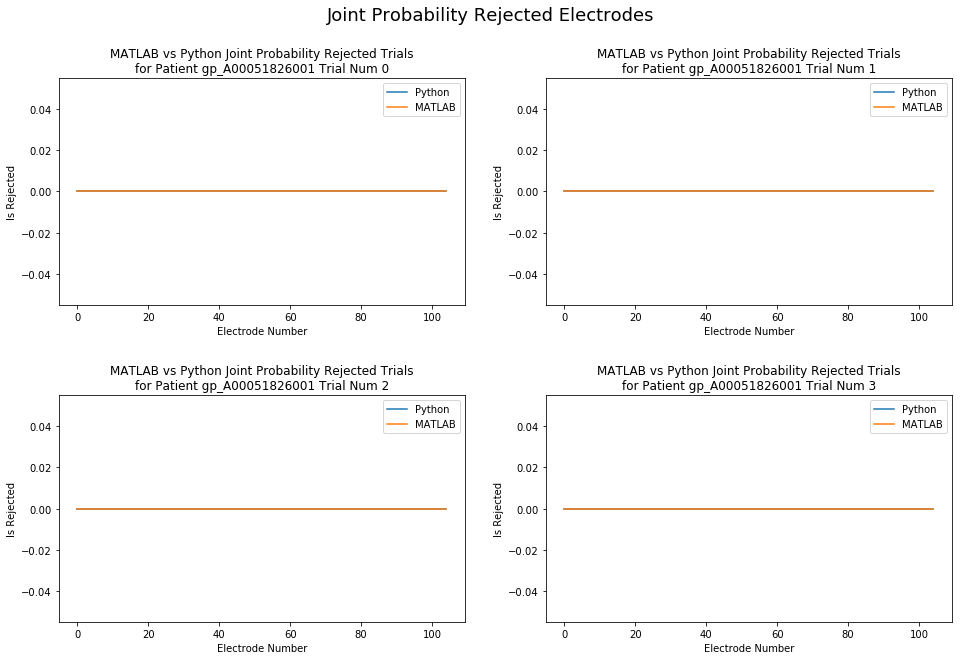

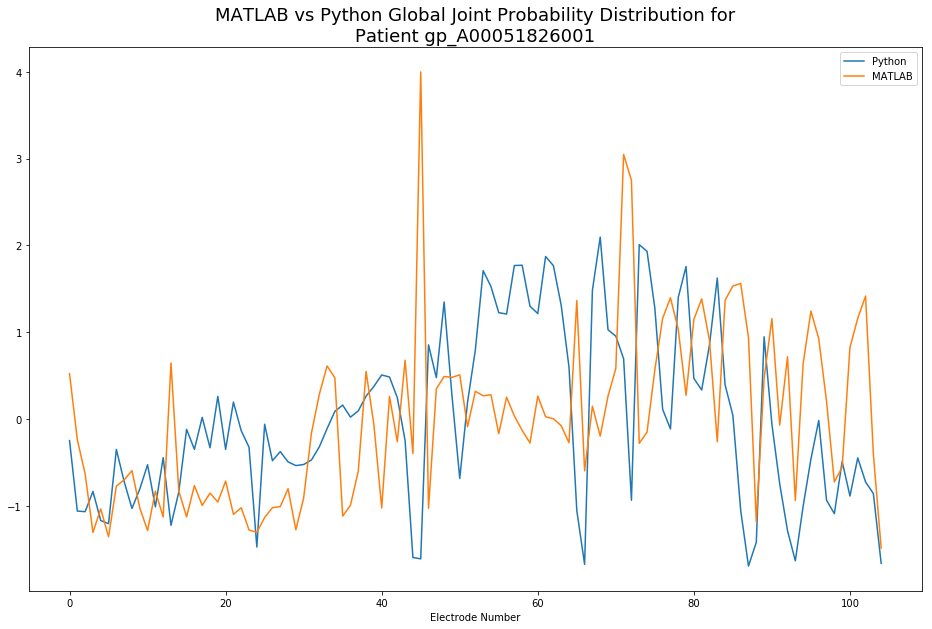

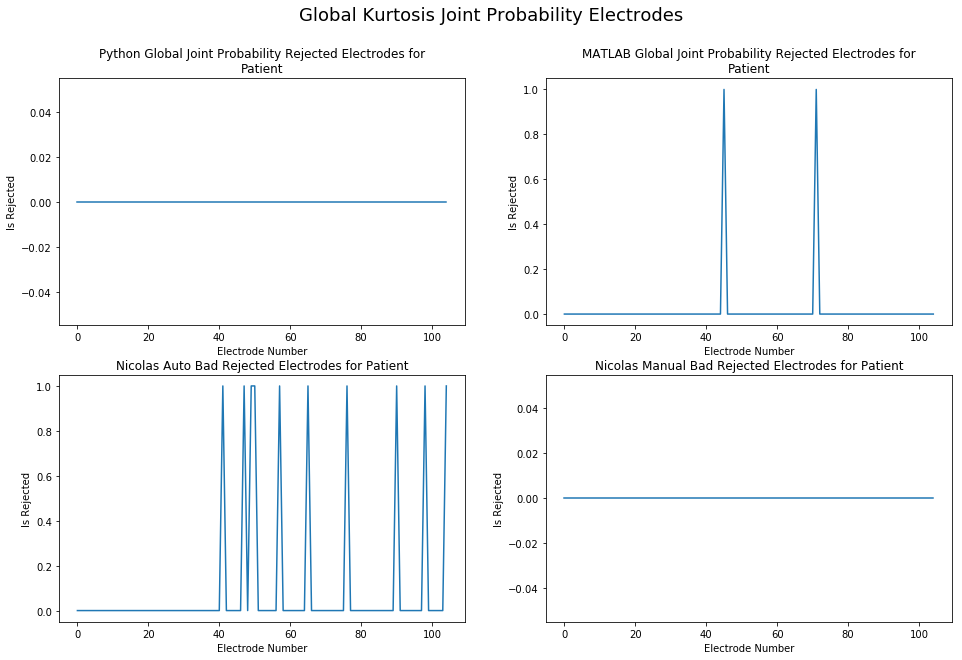

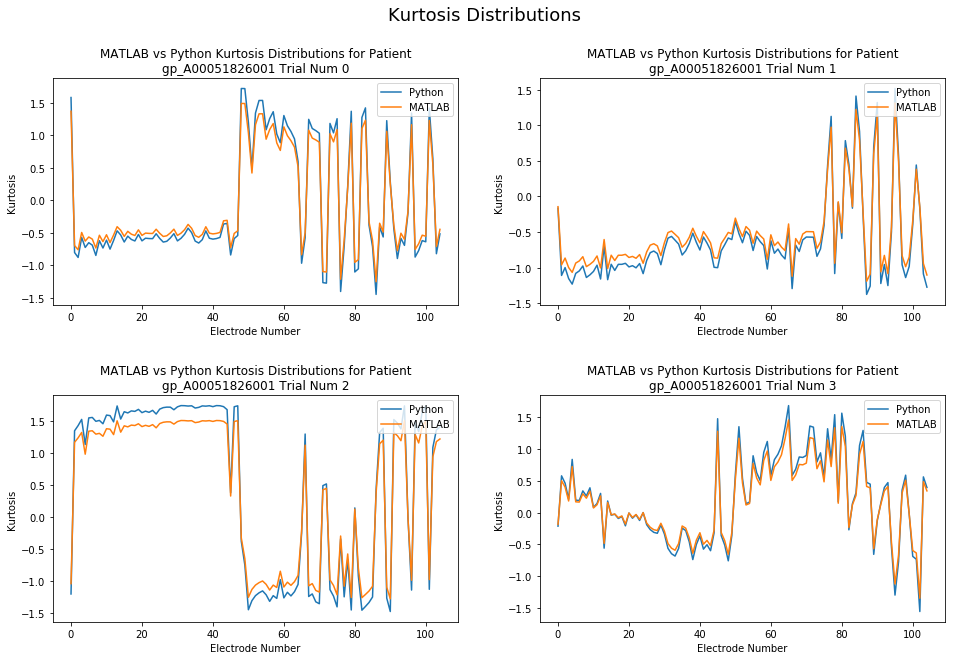

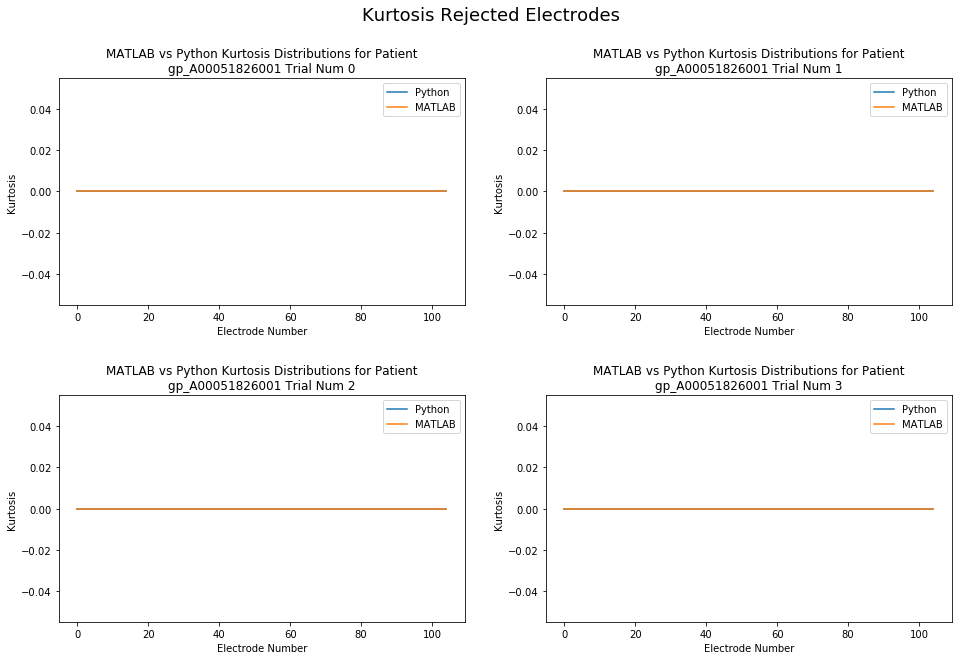

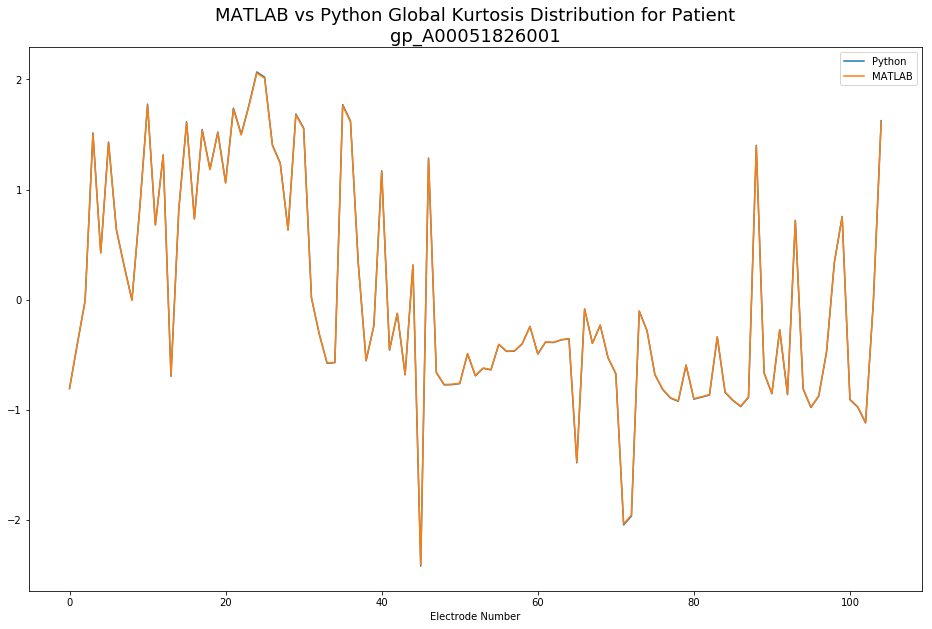

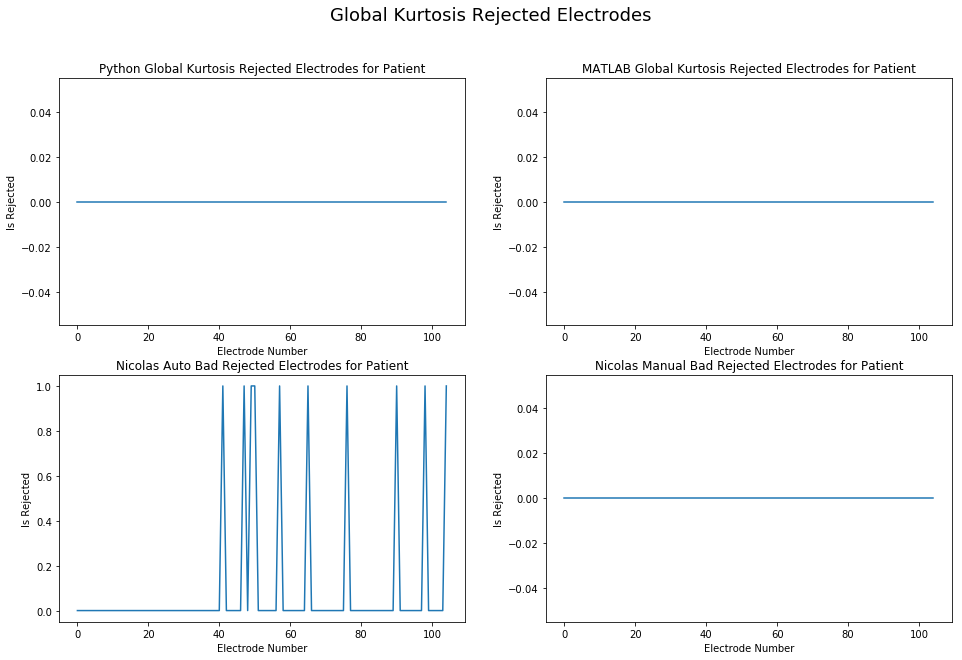

In [23]:
for name in patient_names:
    plot_data(name)

In [24]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import matlab.engine
import os
# Fix random seed
initseed = 123456789
np.random.seed(initseed)
import StringIO
out = StringIO.StringIO()

In [25]:
def to_matlab_comp(mat, eng):
    currwd = os.getcwd()
    os.chdir("/home/nitin/hopkins/neurodata/orange-panda")
    scipy.io.savemat('notes/bad_chan_detect/temp/test.mat', mdict = {"arr":mat})
    loaded_mat = eng.load(os.getcwd() + '/notes/bad_chan_detect/temp/test.mat')
    data = eng.double(loaded_mat.values()[0])
    os.chdir(currwd)
    return data

In [26]:
# get patient data
patient, time, zero = list(get_patient("gp_A00051826001.mat")[i] for i in [0, 1, 4])
# get rid of 0 electrodes
test_dat = patient[:, list(set(range(111)) - set(zero))]
# reshape data with trials
num_trials = 4
test_dat = trials(test_dat, num_trials)
mat_test_dat = np.swapaxes(test_dat, 1, 2)
test_glob_dat = np.reshape(test_dat, (test_dat.shape[0], test_dat.shape[1] * test_dat.shape[2]))

In [27]:
mat_glob_dat = to_matlab_comp(test_glob_dat, eng)

NameError: name 'eng' is not defined

In [ ]:
mat_spec_glob = mat_glob_dat

In [ ]:
os.chdir("/home/nitin/hopkins/neurodata/orange-panda/notes/bad_chan_detect")

mat_jp, mat_rej = eng.jointprob(mat_spec_glob, 3, [], 1, 1000.0, nargout = 2, stdout = out)

In [ ]:
mat_spec_jp = mat_jp
mat_spec_rej = mat_rej

In [ ]:
print out.getvalue()

In [87]:
def jointprob(S, thresh, oldjp, normalize, discret = 1000):
    # get num chans and trials and time
    channels = 0
    trials = 0
    timepts = 0
    if S.ndim == 1 or S.ndim == 2:
        channels = S.shape[0]
        trials = S.shape[1]
    elif S.ndim == 3:
        channels = S.shape[0]
        trials = S.shape[1]
        timepts = S.shape[2]
    else:
        print "Bad dimensions"
        return
    # Get Joint Probs
    jp = np.zeros((channels, trials))
    if oldjp.size:
        jp = oldjp
    else:
        jp = []
        if S.ndim == 3:
            for c in range(channels):
                tmp, dist = realproba(S[c,:,:], discret)
                jp.append(np.log(tmp))
            jp = np.asarray(jp)
            jp = -np.sum(jp, axis=2)
        elif S.ndim == 2:
            print "Swag"
            jp, dist = realproba(S[:,:], discret)
            print np.mean(jp, axis=1)
            jp = -np.sum(np.log(jp), axis=1)
            print np.mean(jp), np.std(jp)
    # Normalize data
    if normalize:
        tmpjp = jp
        if normalize == 2:
            tmpjp = sort(jp);
            totrim = round(len(tmpjp) * 0.1)
            tmpjp = tmpjp[totrim : -totrim]
        if S.ndim == 2:
            jp = (jp - np.mean(tmpjp)) / np.std(tmpjp)
        elif S.ndim == 3:
            ones = np.ones(jp.shape)
            mean = np.mean(jp, axis=1, keepdims=True)
            std = np.std(jp, axis=1, keepdims=True)
            jp = np.divide(jp - mean * ones, std)
    # Reject bad elecs
    rej = []
    for i in thresh:
        rej.append(abs(jp) > i)
    return jp, np.asarray(rej)

def realproba(D, b = 1000):
    SIZE = D.shape[0] * D.shape[1]
    P = np.zeros(b)
    P_dist = np.zeros(b)
    minimum = np.min(D)
    maximum = np.max(D)
    D = np.floor((D - minimum)/(maximum - minimum) * (b - 1)).astype(int)
    D_flat = np.ndarray.flatten(D)
    for i in range(SIZE):
        P_dist[D_flat[i]] = P_dist[D_flat[i]] + 1
    P = P_dist[D] / SIZE
    P_dist = P_dist / SIZE
    if P_dist.ndim < P.ndim:
        P_dist = np.expand_dims(P_dist, P.ndim - P_dist.ndim)
    return P, P_dist.T


In [88]:
jointprob(test_glob_dat, [3], np.asarray([]), 1, 1000)

Swag
[ 0.00630528  0.00751083  0.00753381  0.00721032  0.00773066  0.00782045
  0.00647783  0.00697504  0.00746548  0.00712839  0.00674988  0.00745196
  0.00662074  0.00779774  0.00718719  0.00621638  0.00648052  0.00606801
  0.00645739  0.00579551  0.00648846  0.00587642  0.00623618  0.00648399
  0.00837475  0.00616286  0.00667089  0.00652757  0.00667614  0.00676273
  0.00674402  0.00661288  0.00641347  0.00614878  0.00592664  0.00591355
  0.00606365  0.00593638  0.005738    0.00564266  0.00553657  0.00552455
  0.00577404  0.00632265  0.00861318  0.00856023  0.00523302  0.00552002
  0.00479671  0.0057281   0.00690664  0.00583845  0.0052342   0.00456437
  0.00468903  0.00492209  0.00493308  0.0045435   0.00454235  0.00487562
  0.00493067  0.00448437  0.00454472  0.0048654   0.00544708  0.0074326
  0.00879259  0.00473858  0.00435058  0.00507049  0.00511924  0.00501535
  0.0071537   0.00440267  0.00444556  0.00486858  0.00590217  0.00614895
  0.00474896  0.0045431   0.00552988  0.0056633

(array([-0.24776688, -1.05967966, -1.066939  , -0.83366647, -1.16907837,
        -1.2045024 , -0.35051894, -0.72044966, -1.02967035, -0.80653533,
        -0.52597886, -1.01115246, -0.44502878, -1.22366379, -0.83996843,
        -0.1181038 , -0.34889228,  0.01966315, -0.33037224,  0.26141639,
        -0.3491186 ,  0.19535332, -0.13478396, -0.32425046, -1.47381349,
        -0.05990166, -0.47977823, -0.3753372 , -0.49298793, -0.53593363,
        -0.52346456, -0.47112719, -0.32142942, -0.11049885,  0.08934427,
         0.16052275,  0.02221475,  0.09458216,  0.26431433,  0.37600366,
         0.50837304,  0.48401125,  0.24677276, -0.24936145, -1.59466384,
        -1.61014165,  0.85492793,  0.47702164,  1.34870152,  0.27426798,
        -0.68350993,  0.19401545,  0.79690129,  1.70940508,  1.52739809,
         1.22545382,  1.209998  ,  1.76903792,  1.77164391,  1.29979928,
         1.21543131,  1.87256946,  1.76758811,  1.31052173,  0.59782941,
        -1.05380455, -1.67356502,  1.48433128,  2.0

In [ ]:
probdist = 